## Battling Overfitting

In this notebook we'll tackle overfitting by examining the IMDB movieset again.

In [1]:
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\Jacob\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Jacob\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mea

I'm going to stick to the simple binary vectors in this notebook, since we have so many other things to play with.

In [3]:
def vectorize_sequences (sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [4]:
train_data_vectors = vectorize_sequences(train_data)
test_data_vectors = vectorize_sequences(test_data)

## Time to build a model!

In [5]:
from keras import models
from keras import layers

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

## Time to use Keras's built in validation data splitter

We can set Keras to automatically split our training data for us and hold out a portion for validation.  This is a very useful method.  I'll set the validation split to be `0.1` or 10% of the training data.

We also want to plot the learning curve of our training, in order to do that we're going to return the result of `fit` into an object.

I'm going to fit for 20 epochs, because I **want** to overfit this network, so we can see the full learning curve.



In [7]:
history = model.fit(train_data_vectors, train_labels, validation_split=0.1, epochs =20 , batch_size=512)

Epoch 1/20
44/44 [==============================] - 1s 12ms/step - loss: 0.4800 - accuracy: 0.8093 - val_loss: 0.3571 - val_accuracy: 0.8796
Epoch 2/20
44/44 [==============================] - 0s 8ms/step - loss: 0.2785 - accuracy: 0.9071 - val_loss: 0.2888 - val_accuracy: 0.8920
Epoch 3/20
44/44 [==============================] - 0s 8ms/step - loss: 0.2086 - accuracy: 0.9282 - val_loss: 0.2750 - val_accuracy: 0.8956
Epoch 4/20
44/44 [==============================] - 0s 8ms/step - loss: 0.1691 - accuracy: 0.9424 - val_loss: 0.2970 - val_accuracy: 0.8880
Epoch 5/20
44/44 [==============================] - 0s 8ms/step - loss: 0.1417 - accuracy: 0.9516 - val_loss: 0.3004 - val_accuracy: 0.8872
Epoch 6/20
44/44 [==============================] - 0s 8ms/step - loss: 0.1217 - accuracy: 0.9593 - val_loss: 0.3117 - val_accuracy: 0.8844
Epoch 7/20
44/44 [==============================] - 0s 8ms/step - loss: 0.1019 - accuracy: 0.9678 - val_loss: 0.3322 - val_accuracy: 0.8864
Epoch 8/20
44/44 [=

# Plotting the loss and accuracy functions as learning curves.

Note that keras automatically printed out the loss function on the validation data as it trained.
Now we need to plot these values, they have been stored in our object `history`


In [8]:
# we can access the loss for each epoch by using the key for the `history.history` dictionary
history.history['loss']

[0.4800434410572052,
 0.27851632237434387,
 0.20857541263103485,
 0.1691107153892517,
 0.14165544509887695,
 0.12167492508888245,
 0.10194294899702072,
 0.08898758888244629,
 0.07510984688997269,
 0.0625820904970169,
 0.05295596644282341,
 0.04320451244711876,
 0.038163963705301285,
 0.028092583641409874,
 0.027702761813998222,
 0.019091330468654633,
 0.013814798556268215,
 0.01294366829097271,
 0.009611197747290134,
 0.009008028544485569]

In [13]:
# plotting function
def plot_learn_curve(history, epoch_range = -1):
    
    loss = history.history['loss']
    validation_loss = history.history['val_loss']

    acc = history.history['accuracy']
    validation_acc = history.history['val_accuracy']

    epochs = range(1, (len(loss) + 1))
    
    fig, ax = plt.subplots(2,1, figsize = (8,10), sharex=True)
    
    ax[0].plot(epochs[:epoch_range], loss[:epoch_range], 'g', label = "Training Loss")
    ax[0].plot(epochs[:epoch_range], validation_loss[:epoch_range], 'b', label = "Validation Loss")
    ax[0].legend()
    ax[0].set(ylabel = 'Loss')
    
    ax[1].plot(epochs[:epoch_range], acc[:epoch_range], 'g', label = "Training Accuracy")
    ax[1].plot(epochs[:epoch_range], validation_acc[:epoch_range], 'b', label = "Validation Accuracy")
    ax[1].legend()
    ax[1].set(ylabel = "Accuracy")
    #plt.title("Training and Validation Loss")
    
    
    plt.xlabel('epochs')
    #plt.ylabel(score)


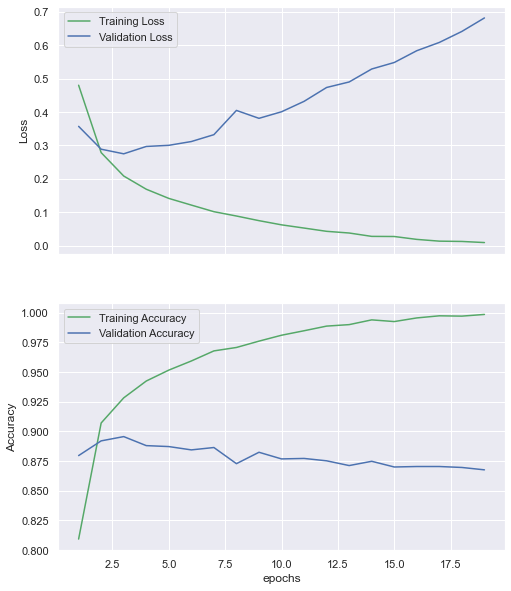

In [14]:
plot_learn_curve(history, epoch_range= -1)

# At what epoch did we start overfitting?

Hint : try adjusting the `epoch_range` argument to the plotting function to zoom in

your answer: 3 ish

# Do you think we should worry about overfitting on the loss or accuracy more?

Which of the two graphs above is more important?

your answer:

## Using early stopping to prevent overfitting

Keras has a great built-in method called "early stopping" which you can setup to prevent the model from overfitting.
Basically we tell keras to stop training when the loss on the **validation** data starts to get worse.

In [15]:
# let's wrap our model into a function so we can re-use it

def new_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))


    model.compile(optimizer = 'rmsprop',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])
    
    return model

In [16]:
model = new_model()

## import callbacks

We're going to make a callback for early stopping and then pass it into the fit function

In [17]:
from keras import callbacks

In [18]:
es = callbacks.EarlyStopping(monitor='val_loss')

history = model.fit(train_data_vectors, train_labels, validation_split=0.1, epochs =20 , batch_size=512, callbacks=[es])

Epoch 1/20
44/44 [==============================] - 0s 11ms/step - loss: 0.4650 - accuracy: 0.8084 - val_loss: 0.3324 - val_accuracy: 0.8892
Epoch 2/20
44/44 [==============================] - 0s 8ms/step - loss: 0.2680 - accuracy: 0.9103 - val_loss: 0.2867 - val_accuracy: 0.8964
Epoch 3/20
44/44 [==============================] - 0s 7ms/step - loss: 0.2036 - accuracy: 0.9299 - val_loss: 0.2852 - val_accuracy: 0.8920
Epoch 4/20
44/44 [==============================] - 0s 8ms/step - loss: 0.1678 - accuracy: 0.9432 - val_loss: 0.2856 - val_accuracy: 0.8904


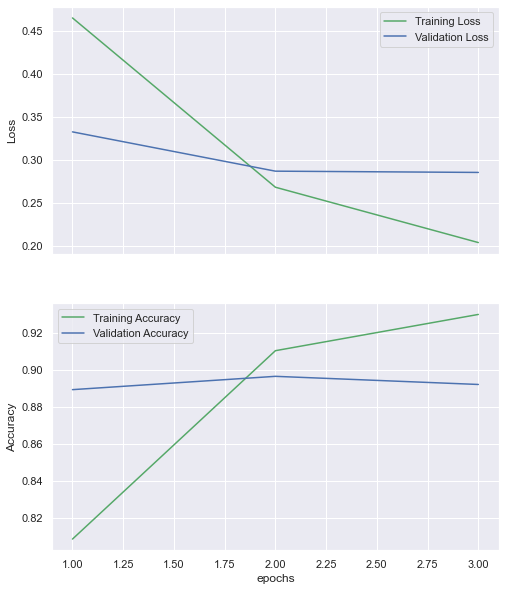

In [19]:
plot_learn_curve(history)

# Other Options?

So early stopping is great, but it's very limiting.
The main idea here is that we want to reduce the complexity of the network.
We could do that by making fewer layers, or smaller layers.
We can also try dropout and l1 or l2 regularization.

Let's go with l1 regularization.

## L1 Regularization

In [20]:
from keras import regularizers

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(), activation='relu'))
model.add(layers.Dense(16,kernel_regularizer=regularizers.l1(), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])



## Keep early stopping

Let's keep early stopping, but add a "patience" parameter so it will go a bit longer before quitting.
Patience says how many extra epochs to go before giving up, we'll let it try an exta 2 epochs.

So our hope with regularization is that it will be able to train for longer before overfitting.

In [22]:
es = callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(train_data_vectors, train_labels, validation_split=0.1, epochs =20 , batch_size=512, callbacks=[es])

Epoch 1/20
44/44 [==============================] - 1s 12ms/step - loss: 3.9168 - accuracy: 0.5950 - val_loss: 1.9102 - val_accuracy: 0.5980
Epoch 2/20
44/44 [==============================] - 0s 8ms/step - loss: 1.8678 - accuracy: 0.6515 - val_loss: 1.8045 - val_accuracy: 0.6736
Epoch 3/20
44/44 [==============================] - 0s 8ms/step - loss: 1.7725 - accuracy: 0.7120 - val_loss: 1.7150 - val_accuracy: 0.7096
Epoch 4/20
44/44 [==============================] - 0s 8ms/step - loss: 1.6885 - accuracy: 0.7344 - val_loss: 1.6405 - val_accuracy: 0.7536
Epoch 5/20
44/44 [==============================] - 0s 8ms/step - loss: 1.6129 - accuracy: 0.7519 - val_loss: 1.5705 - val_accuracy: 0.7332
Epoch 6/20
44/44 [==============================] - 0s 7ms/step - loss: 1.5467 - accuracy: 0.7675 - val_loss: 1.5061 - val_accuracy: 0.7792
Epoch 7/20
44/44 [==============================] - 0s 8ms/step - loss: 1.4898 - accuracy: 0.7805 - val_loss: 1.4596 - val_accuracy: 0.7752
Epoch 8/20
44/44 [=

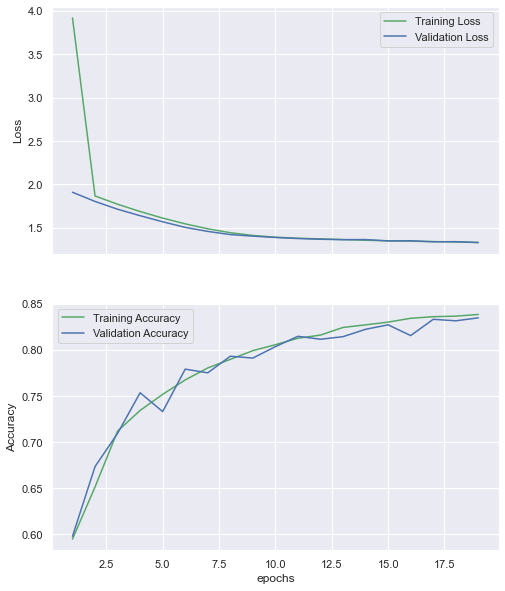

In [23]:
plot_learn_curve(history)

##  Is this better?

Without looking at the test data (which you **should not** do) how can you tell if this is better or not?

Let's break it into two questions

(1) Has the regularization helped reduce overfitting?

(2) Is the overall result after training the model better or worse (than not using regularization) ?

In [25]:
max(history.history['val_accuracy'])

0.8348000049591064

your answer here :

(1) 

(2) 

## Same experiment with dropout.

In order to use dropout we add it as a layer.

In [26]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])


In [27]:
es = callbacks.EarlyStopping(monitor='val_loss', patience=2)
history_dropout = model.fit(train_data_vectors, train_labels, validation_split=0.1, epochs =20 , batch_size=512, callbacks=[es])

Epoch 1/20
44/44 [==============================] - 1s 12ms/step - loss: 0.5688 - accuracy: 0.7062 - val_loss: 0.4010 - val_accuracy: 0.8740
Epoch 2/20
44/44 [==============================] - 0s 9ms/step - loss: 0.4097 - accuracy: 0.8288 - val_loss: 0.3095 - val_accuracy: 0.8880
Epoch 3/20
44/44 [==============================] - 0s 9ms/step - loss: 0.3390 - accuracy: 0.8728 - val_loss: 0.2788 - val_accuracy: 0.8908
Epoch 4/20
44/44 [==============================] - 0s 8ms/step - loss: 0.2891 - accuracy: 0.8939 - val_loss: 0.2682 - val_accuracy: 0.8976
Epoch 5/20
44/44 [==============================] - 0s 8ms/step - loss: 0.2521 - accuracy: 0.9108 - val_loss: 0.2833 - val_accuracy: 0.9008
Epoch 6/20
44/44 [==============================] - 0s 8ms/step - loss: 0.2254 - accuracy: 0.9242 - val_loss: 0.2839 - val_accuracy: 0.8988


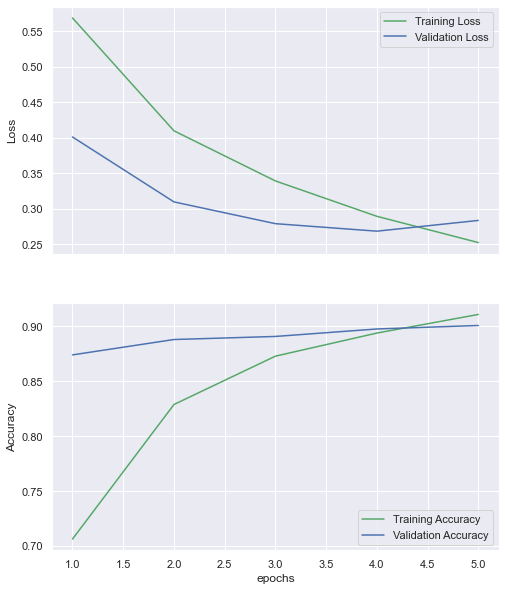

In [28]:
plot_learn_curve(history_dropout)

In [30]:
max(history_dropout.history["val_accuracy"])

0.9007999897003174

## Is it better?


(1) Has dropout helped reduce overfitting?

(2) Is the overall result after training the model better or worse (than not using dropout) ?

(3) same questions, compare to regularization.

your answer :

## How high can you get the accuracy to go?

I challenge you to experiment further with dropout, regularization (l1 and l2) to increase the accuracy.
In fact, you may even want to change the network topology.

When you are done with **all** your experiments go ahead and check your accuracy on the test data.
But only do this one time! Otherwise you will just risk overfitting to the test data.


In [210]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10_000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [211]:
model.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_193 (Dense)            (None, 64)                640064    
_________________________________________________________________
dropout_123 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_194 (Dense)            (None, 32)                2080      
_________________________________________________________________
dropout_124 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_195 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_125 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_196 (Dense)            (None, 1)               

In [212]:
es = callbacks.EarlyStopping(monitor='val_loss', patience=2)
history_dropout = model.fit(train_data_vectors, train_labels, validation_split=0.1, epochs =20 , batch_size=512, callbacks=[es])

Epoch 1/20
44/44 [==============================] - 1s 17ms/step - loss: 0.6078 - accuracy: 0.6532 - val_loss: 0.4040 - val_accuracy: 0.8744
Epoch 2/20
44/44 [==============================] - 1s 14ms/step - loss: 0.4210 - accuracy: 0.8284 - val_loss: 0.2933 - val_accuracy: 0.8872
Epoch 3/20
44/44 [==============================] - 1s 14ms/step - loss: 0.3215 - accuracy: 0.8864 - val_loss: 0.2761 - val_accuracy: 0.8932
Epoch 4/20
44/44 [==============================] - 1s 14ms/step - loss: 0.2581 - accuracy: 0.9111 - val_loss: 0.2863 - val_accuracy: 0.8920
Epoch 5/20
44/44 [==============================] - 1s 14ms/step - loss: 0.2105 - accuracy: 0.9304 - val_loss: 0.3107 - val_accuracy: 0.8888


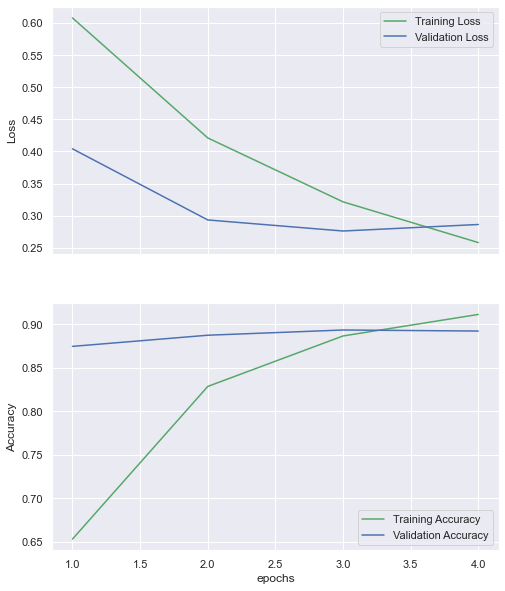

In [213]:
plot_learn_curve(history_dropout)

In [137]:
max(history_dropout.history["val_accuracy"])

0.8924000263214111